A11.2021.13812
GITA KARTIKA

In [384]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [385]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. PENGUMPULAN DATA**

In [386]:
dir = '/content/drive/MyDrive/heart+disease/hungarian.data'

In [387]:
# Read Data
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

**2. TELAAH DATA**



- menghasilkan tabel berisi 74 fitur/kkolom yang akan diseleksi

In [388]:
# Convert into DataFrame
data = itertools.takewhile(
    lambda x: len(x) == 76,
     (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines),10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [390]:
# Remove first column
df = df.drop(df.columns[0], axis=1)

# Remove last column
df = df.iloc[:, :-1]

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.


In [391]:
# change datatype to float
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

Mengubah nilai -9.0 menjadi Null/Nan

**3. VALIDASI DATA**

In [392]:
# Channge -9.0 to null values
df.replace(-9.0, np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [393]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

**4. MENENTUKAN OBJEK DATA**



- memberi nama kolom
- seleksi fitur menjadi 14



In [394]:
# column selection
df2 = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

# change column names
df2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [395]:
# Show 14 column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


**5. MEMBERSIIHKAN DATA**



- menghapus kolom yang memiliki missing values lebih dari 60%
- menghapus data duplikat
- menampilkan heatmap untuk mengetahui korelasi antar kolom

In [396]:
# Checking missing value in each column
df2.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [397]:
df2.drop(['slope','ca', 'thal'], axis=1, inplace=True)
df2.head()

<ipython-input-397-2036aaab1cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['slope','ca', 'thal'], axis=1, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,0.0


In [398]:
meanTBPS = df2['trestbps'].dropna()
meanCHOL = df2['chol'].dropna()
meanFBS = df2['fbs'].dropna()
meanTHALACH = df2['thalach'].dropna()
meanRESTECG = df2['restecg'].dropna()
meanEXANG = df2['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanCHOL = meanCHOL.astype(float)
meanFBS = meanFBS.astype(float)
meanTHALACH = meanTHALACH.astype(float)
meanRESTECG = meanRESTECG.astype(float)
meanEXANG = meanEXANG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanCHOL = round(meanCHOL.mean())
meanFBS = round(meanFBS.mean())
meanTHALACH = round(meanTHALACH.mean())
meanRESTECG = round(meanRESTECG.mean())
meanEXANG = round(meanEXANG.mean())

In [399]:
#mengubah nilai null dengan nilai mean
fill_values = {'trestbps': meanTBPS, 'chol': meanCHOL, 'fbs': meanFBS,
               'thalach': meanTHALACH, 'restecg': meanRESTECG, 'exang': meanEXANG}
df_cleaned = df2.fillna(value=fill_values)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [400]:
df_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [401]:
#melakukan cek data duplikat
duplicate = df_cleaned.duplicated()
df_cleaned[duplicate]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [402]:
print("Data duplikat: ")
df_cleaned[df_cleaned.duplicated(keep=False)]

Data duplikat: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [403]:
df_cleaned = df_cleaned.drop_duplicates()
print("Data duplikat: ")
df_cleaned[df_cleaned.duplicated(keep=False)]

Data duplikat: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [404]:
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [405]:

df_cleaned.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

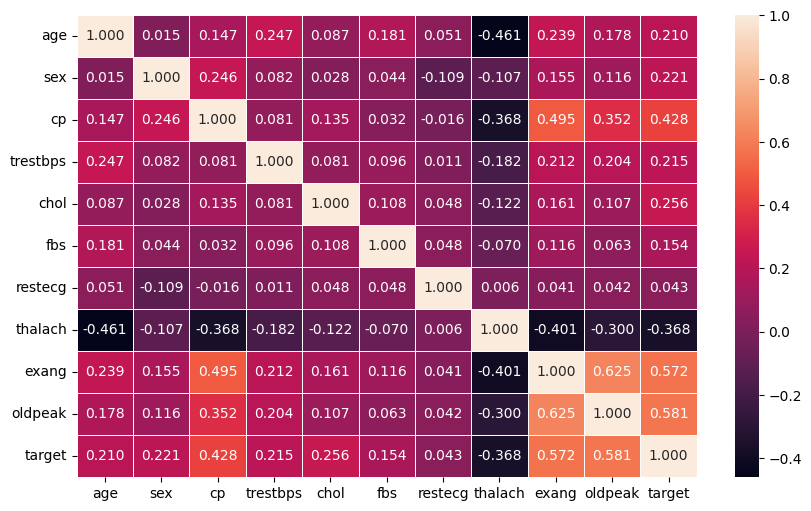

In [406]:
# Display Heatmap for understanding correlation between each column
corr_mat = df_cleaned.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt=".3f")

**6. KONSTRUKSI DATA**



- menunjukkan jumlah target dalam bentuk diagram
- melakukan oversampling
- melakukan normalisasi data
- **melakukan** splitting

In [407]:
df_cleaned.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [408]:
# Drop target column and assigning rest of the columns into X
X = df_cleaned.drop('target', axis=1)

# Assigning target columns into y
y = df_cleaned['target']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

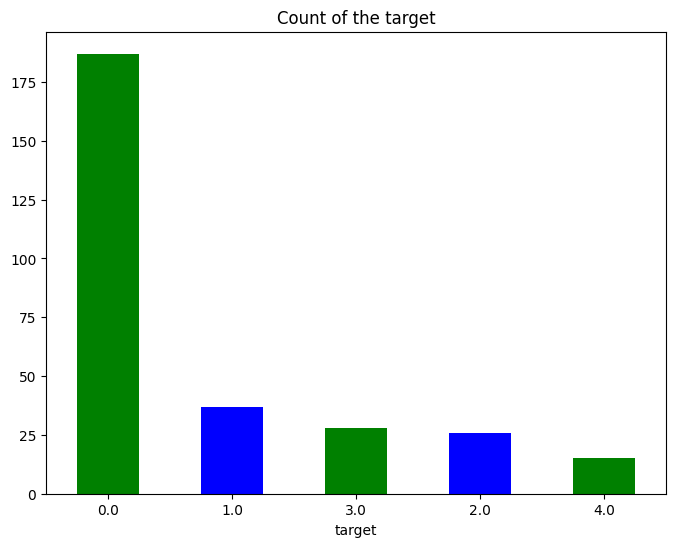

In [409]:
# Display count of the target
df_cleaned['target'].value_counts().plot(kind='bar', figsize=(8,6), color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)

<function matplotlib.pyplot.show(close=None, block=None)>

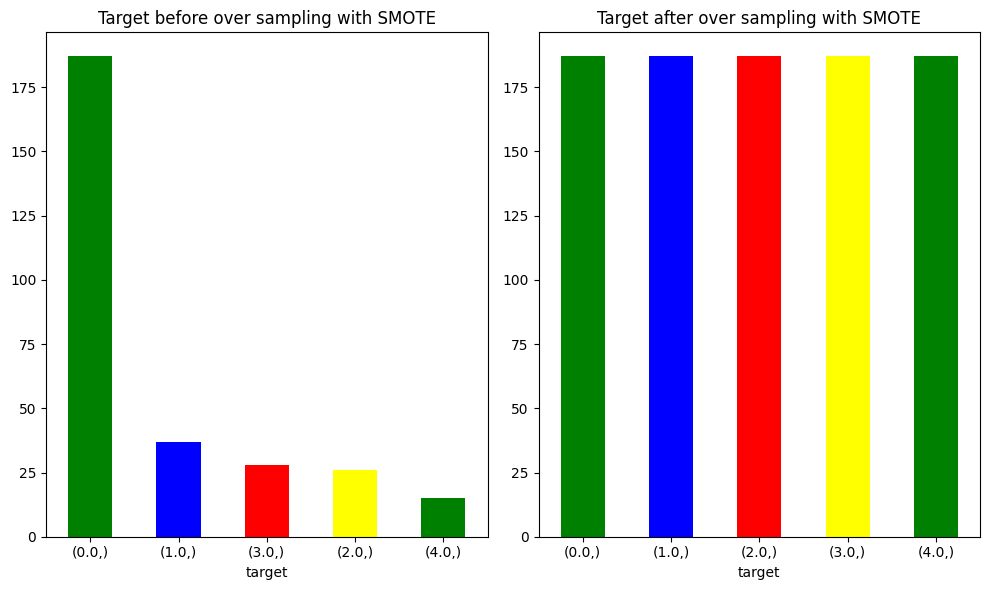

In [410]:
# Oversamplig
smote = SMOTE(random_state=42)
X_smote_resample, y_smote_resample = smote.fit_resample(X,y)

plt.figure(figsize=(10,6))
new_df1 = pd.DataFrame(data=y)

#Display of the target value before oversampling
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Target before over sampling with SMOTE")
plt.xticks(rotation=0);

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_smote_resample)

# Display of the target value after oversamplig
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show

In [411]:
#Before Oversampling
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

In [412]:
#Oversampling with SMOTE
new_df2 = pd.DataFrame(data=y_smote_resample)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64

In [413]:
df_cleaned.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [414]:
# Normalization data
scaler = MinMaxScaler()

X_smote_resample_normal = scaler.fit_transform(X_smote_resample)
dfcek1 = pd.DataFrame(X_smote_resample_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [415]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_smote_resample, y_smote_resample, test_size=0.2, random_state=42, stratify=y_smote_resample)
# Normalization data
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resample_normal, y_smote_resample, test_size=0.2, random_state=42, stratify=y_smote_resample)

**7. PEMODELAN**

In [466]:
# For evaluation matrix
def evaluation_matrix(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    rcl = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    ps = precision_score(y_test, y_pred, average='weighted')

    metric_dict = {'accuracy': round(acc, 3),
                     'recall': round(rcl, 3),
                     'f1': round(f1, 3),
                     'precision': round(ps, 3)
                    }

    return print(metric_dict)

KNN

In [469]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [470]:
y_pred_knn = knn_model.predict(X_test)

In [471]:
print("KNN Model :")
accuracy_score_knn = round(accuracy_score(y_test, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn)
print("classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model :
Accuracy: 0.754
classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [472]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'f1': 0.741, 'precision': 0.745}


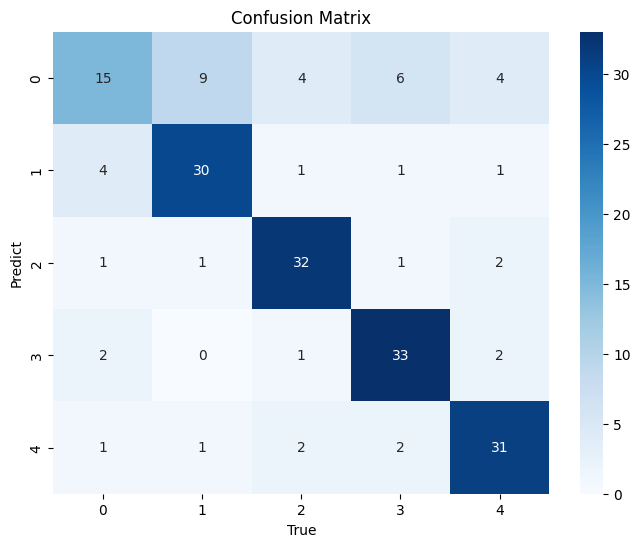

In [473]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

RANDOM FOREST

In [474]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [475]:
y_pred_rf = rf_model.predict(X_test)

In [476]:
print("Random Forest Model :")
accuracy_score_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf)
print("classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model :
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [425]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.92, 'precision': 0.922}


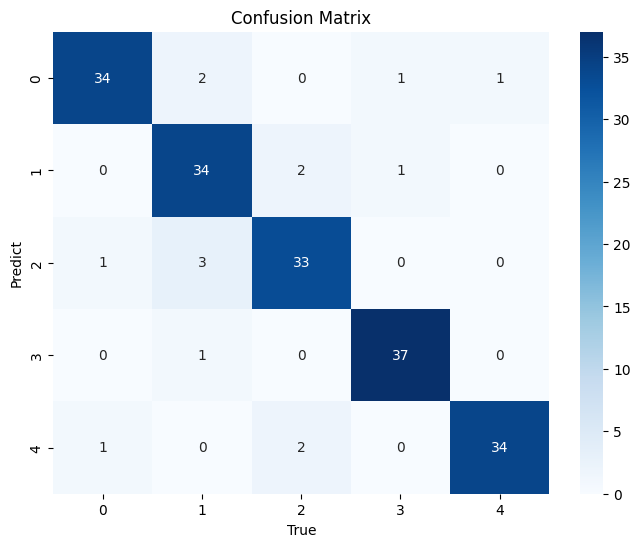

In [477]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [478]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [479]:
y_pred_xgb = xgb_model.predict(X_test)


In [480]:
print("XGBoost Model :")
accuracy_score_xgb = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb)
print("classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model :
Accuracy: 0.904
classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [481]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1': 0.904, 'precision': 0.906}


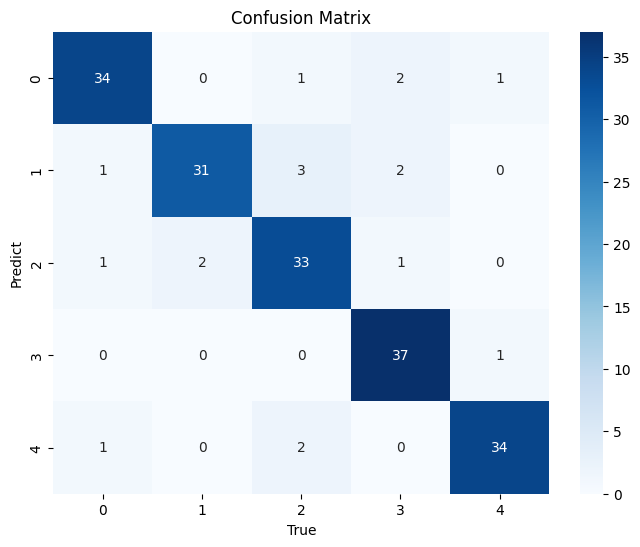

In [482]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

**Normalisasi**

KNN

In [483]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [484]:
y_pred_knn = knn_model.predict(X_test_normal)

In [485]:
print("KNN Model :")
accuracy_score_knn_smote = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

KNN Model :
Accuracy: 0.861
classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [487]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'f1': 0.861, 'precision': 0.863}


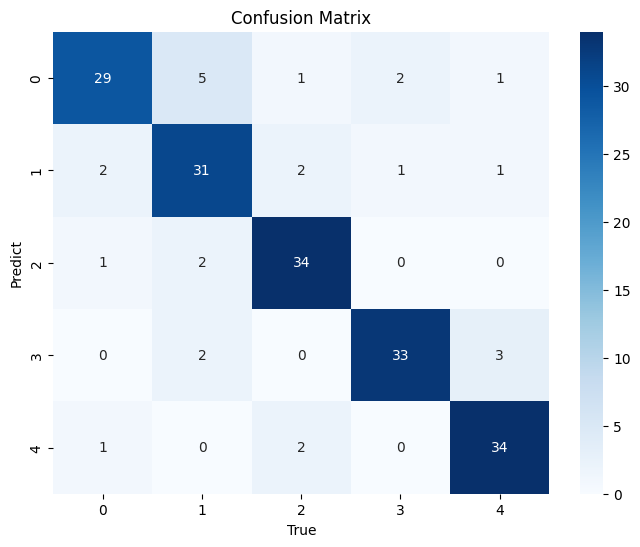

In [488]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

RANDOM FOREST

In [489]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [490]:
y_pred_rf = rf_model.predict(X_test_normal)

In [491]:
print("Random Forest Model :")
accuracy_score_rf_smote = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model :
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [498]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.92, 'precision': 0.922}


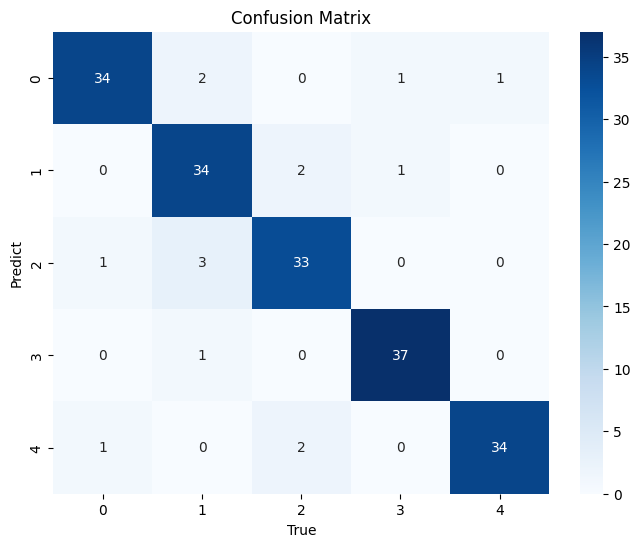

In [493]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [494]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [495]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [497]:
print("XGBoost Model :")
accuracy_score_xgb_smote = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model :
Accuracy: 0.904
classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [499]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1': 0.904, 'precision': 0.906}


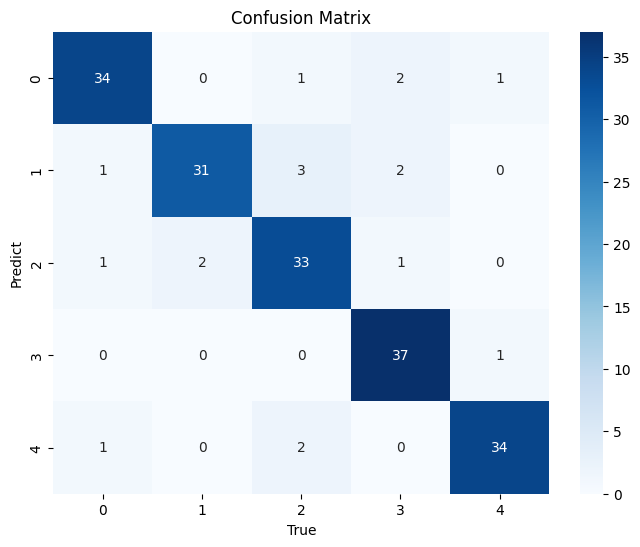

In [500]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

HyperTuning

In [502]:

knn_model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "minkowski"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(knn_model, param_distributions=param_grid, n_iter=100, cv=5, scoring="accuracy")
knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'manhattan', 'leaf_size': 54, 'algorithm': 'auto'}


In [505]:
y_pred_knn = knn_model.predict(X_test_normal)

In [506]:
print("KNN Model :")
accuracy_score_knn_smote_tun = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

KNN Model :
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        38
         1.0       0.82      0.86      0.84        37
         2.0       0.89      0.92      0.91        37
         3.0       0.95      1.00      0.97        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [507]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.92, 'precision': 0.923}


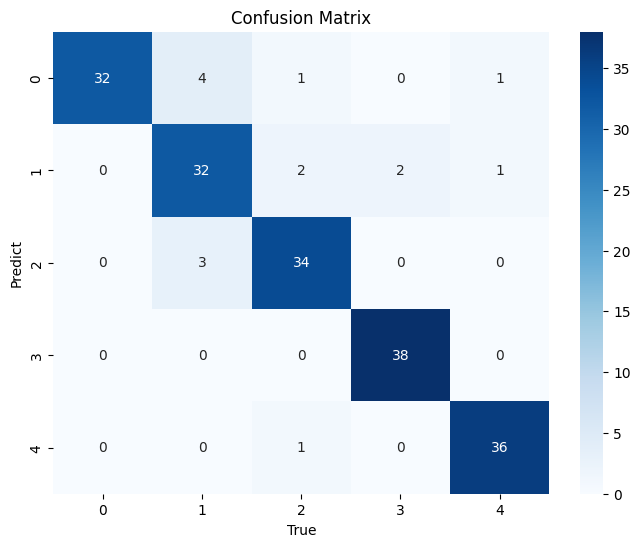

In [508]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


RANDOM FOREST

In [509]:

rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    "random_state": [42, 100, 200],
}

rf_model = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best Parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [510]:
y_pred_rf = rf_model.predict(X_test_normal)

In [511]:
print("KNN Model :")
accuracy_score_rf_smote_tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

KNN Model :
Accuracy: 0.914
classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [512]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'f1': 0.915, 'precision': 0.915}


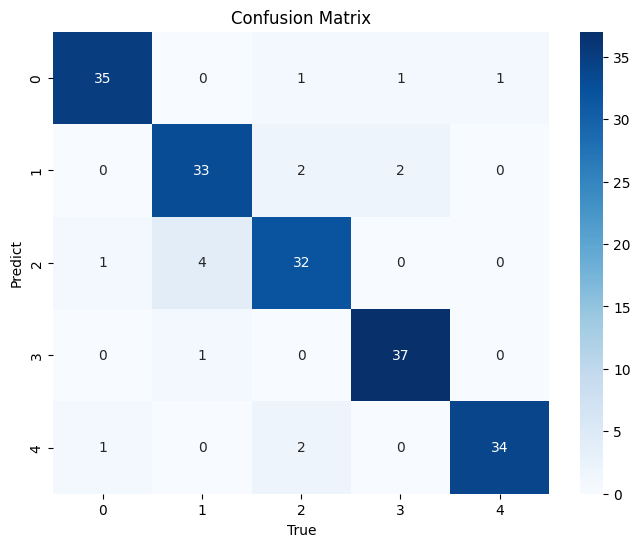

In [513]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [514]:
xgb_model = XGBClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "gamma": [0, 0.1],
    "colsampe_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best Parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:34:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsampe_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsampe_bytree': 0.7}


In [458]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [515]:
print("XGBoost Model :")
accuracy_score_xgb_smote_tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model :
Accuracy: 0.904
classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [516]:
# Evaluation Matrix
evaluation_matrix(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1': 0.904, 'precision': 0.906}


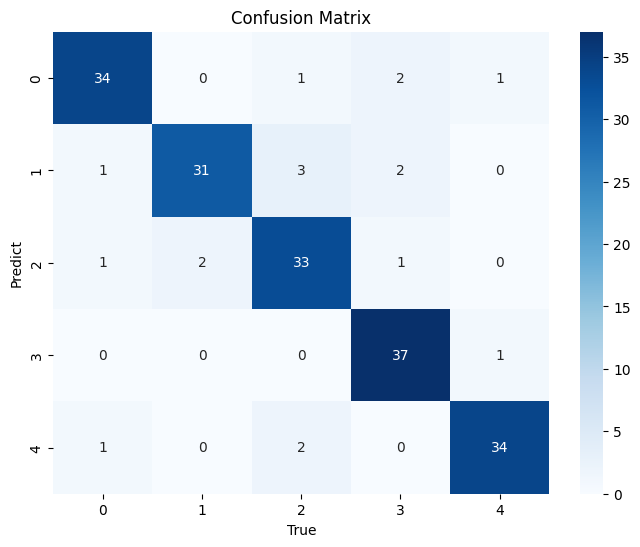

In [518]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

**8. EVALUASI**

In [519]:
#Before Normalization
model_comp1 = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_score_knn*100, accuracy_score_rf*100, accuracy_score_xgb*100]})
model_comp1 = model_comp1.sort_values(by='Accuracy', ascending=False)
model_comp1.head()

,Model,Accuracy
1,Random Forest,92.0
2,XGBoost,90.4
0,KNN,75.4


In [521]:
#After Normalization
model_comp2 = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_score_knn_smote*100, accuracy_score_rf_smote*100, accuracy_score_xgb_smote*100]})
model_comp2 = model_comp2.sort_values(by='Accuracy', ascending=False)
model_comp2.head()

,Model,Accuracy
1,Random Forest,92.0
2,XGBoost,90.4
0,KNN,86.1


In [522]:
# After Tuning
model_comp3 = pd.DataFrame({'Model': ['KKN', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_score_knn_smote_tun*100, accuracy_score_rf_smote_tun*100, accuracy_score_xgb_smote_tun*100]})
model_comp3 = model_comp3.sort_values(by='Accuracy', ascending=False)
model_comp3.head()

,Model,Accuracy
0,KKN,92.0
1,Random Forest,91.4
2,XGBoost,90.4


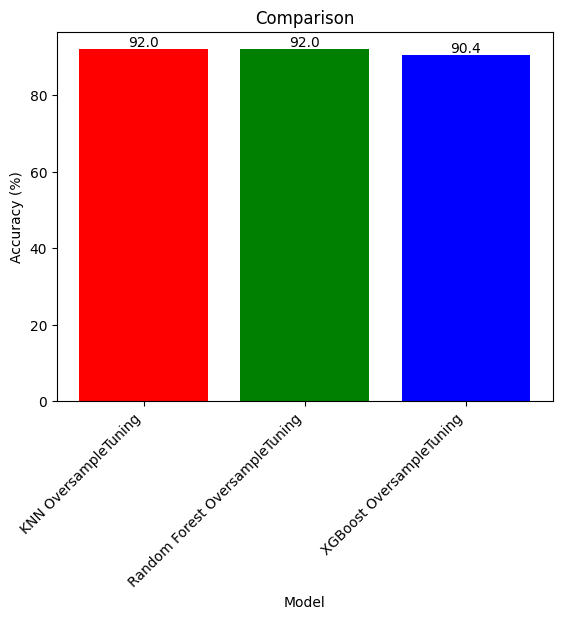

In [523]:
# Best Model Comparision
model_bestcomp = pd.DataFrame({
    'Model': ['KNN OversampleTuning', 'Random Forest OversampleTuning', 'XGBoost OversampleTuning'],
    'Accuracy': [accuracy_score_knn_smote_tun*100, accuracy_score_rf*100, accuracy_score_xgb_smote_tun*100]
})

# Make barplot
fig, ax = plt.subplots()
bars = ax.bar(model_bestcomp['Model'], model_bestcomp['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

# Add label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

10. KESIMPULAN

Dari proses diatas hasil akurasi yang diperoleh sebagai berikut :
1. Akurasi melalui Oversampling
Random Forest: 92.0%
XGBoost: 90.4%
KNN: 75.4%
2. Akurasi melalui Normalisasi
Random Forest: 92.0%
XGBoost: 90.4%
KNN: 86.1%
3. Akurasi melalui HyperTuning Parameter
KNN: 92.0%
Random Forest: 91.4%
XGBoost: 90.4%

**Random Forest**
Oversampling & Normalisasi: Kedua metode ini memberikan akurasi yang sama, yaitu 92.0%.
HyperTuning Parameter: Meskipun tidak mencapai hasil tertinggi (91.4%), Random Forest tetap menunjukkan kinerja yang sangat baik secara keseluruhan. Ini menunjukkan bahwa Random Forest adalah model yang sangat kuat dan konsisten, tidak terlalu dipengaruhi oleh teknik penanganan data atau tuning parameter secara signifikan.

**XGBoost**
Oversampling & Normalisasi: Memberikan akurasi yang sama, yaitu 90.4%.
HyperTuning Parameter: Akurasi tetap pada 90.4%. Ini menunjukkan bahwa XGBoost juga merupakan model yang stabil.

**KNN**
Oversampling: Akurasi terendah di antara semua metode, yaitu 75.4%. Ini menunjukkan bahwa KNN mungkin tidak cocok dengan data yang diolah melalui oversampling.
Normalisasi: Akurasi meningkat menjadi 86.1%, menunjukkan bahwa KNN bekerja lebih baik dengan data yang dinormalisasi.
HyperTuning Parameter: Dengan hyperparameter tuning, akurasi meningkat signifikan menjadi 92.0%, menunjukkan bahwa KNN sangat sensitif terhadap parameter yang digunakan dan dapat mencapai performa tinggi jika di-tuning dengan benar.

Dengan demikian, jika ingin kinerja yang stabil dan konsisten, Random Forest adalah pilihan yang kuat dan handal. Jika Anda dapat melakukan tuning parameter secara ekstensif, KNN dapat mencapai performa yang sangat baik. XGBoost adalah pilihan yang baik jika ingin mencari stabilitas tanpa perlu terlalu banyak tuning parameter, namun tetap mempertimbangkan potensi peningkatan melalui tuning.
Pemilihan model akhir harus mempertimbangkan kebutuhan spesifik dari proyek, seperti kebutuhan interpretabilitas, waktu komputasi, dan karakteristik dataset.